<h1 style = "color : Purple"> Lead Scoring Case Study </h1>
<h2 style = "color : Purple"> Group Members 
- Aamir Farhan Sheikh,
 Aakriti Singh,
 Sumit Soni</h2>

#### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google.

The typical lead conversion rate at X education is around 30%. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

------
#### Goal of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

<h2 style = "color : Brown"> Step 1: Reading and Understanding the Data </h2>

In [1]:
# Importing all the necessary libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Importing and reading the Dataset as leads

leads = pd.read_csv('Leads.csv')
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [3]:
leads.shape

(9240, 37)

We can see that some features in the data set has the value 'Select' in multiple rows. These must be the entries where the users did not select any option and left the value empty.
Also, as mentioned in the problem statement, Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.
Thus we are going to replace these values with null values

In [4]:
# Finding column names in which 'Select' value is available

cols=list(leads.columns)
for i in cols:
    if 'Select' in leads[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


Above are the columns with the value 'Select' in them

In [5]:
# Let's replace the select value in the above columns with null values

value_to_replace = 'Select'

leads.replace(value_to_replace, np.nan, inplace=True)

Let's now study the DataFrame further

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

The above query shows that there are values missing in the dataset.

<h2 style = "color : Brown"> Step 2: Data Cleaning </h2>

In [7]:
#Let's find the percentage of missing values

missing_data = (leads.isnull().mean())*100
missing_data

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

It's evident that there are multiple columns with more than 30% missing values. There is no point in keeping these features. Let's drop these features and see how the data looks.

In [8]:
# Limiting the search to the features with more than 30% missing values

missing = missing_data[missing_data >= 30]
missing

Specialization                        36.580087
How did you hear about X Education    78.463203
Tags                                  36.287879
Lead Quality                          51.590909
Lead Profile                          74.188312
City                                  39.707792
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

- Most of the above columns have high number of missing values.
- Few columns such as 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile' and other columns starting with the word 'Asymmetrique' are created by after some analysis. Since, we want to analyze raw data, we can drop these columns.
- The column 'City' won't play a vital role in analysis as it is an online education platform. Hence, we can drop this column.
- 'Specialization' column has ~36% missing values but the information present in this column can be useful for prediction. Let's keep this column and further study it. 

In [9]:
# Creating a new DataFrame 'leads1' 

leads1 = leads.copy()

In [10]:
# Dropping all the columns except for 'Specialization'

leads1.drop(columns=['How did you hear about X Education','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index',
                     'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','City'], axis=1, inplace=True)

In [11]:
leads1.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0     NaN                      NaN                      Unemployed   
1   India                      NaN                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                      NaN                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                          

In [12]:
leads1.shape

(9240, 28)

From the above result, the columns 'Prospect ID' and 'Lead Number' both has unique identifiers for the users. So we can drop one of these columns. Let's drop 'Prospect ID'

In [13]:
# Dropping 'Prospect ID' column

leads1.drop(columns='Prospect ID', axis=1, inplace=True)

In [14]:
# Let's now look at other columns with missing values

(leads1.isnull().mean()*100).sort_values(ascending=False)

Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
X Education Forums                                0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.0000

Let's look at these columns one by one

In [15]:
# Exploring the column 'Specialization'

leads1['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

This features seems important for our analysis. Let's create another category 'Other' and fill the missing values in the column

In [16]:
# Filling missing values with 'Other'

leads1['Specialization'].fillna('Other',inplace=True)

In [17]:
leads1['Specialization'].value_counts()

Specialization
Other                                3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

Let's explore all the other columns with missing values

In [18]:
columnsList= ['What matters most to you in choosing a course','What is your current occupation','Country','TotalVisits',
              'Page Views Per Visit','Last Activity','Lead Source']

for i in columnsList:
        perc=100*leads1[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : What matters most to you in choosing a course 

What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : What is your current occupation 

What is your current occupation
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Country 

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore           

#### Insights:
- <strong><span style="color:maroon">What matters most to you in choosing a course:</span></strong> This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will `not provide any insight`. So we better drop this column

- <strong><span style="color:blue">What is your current occupation:</span></strong> We can impute the missing values with `'Unemployed'` as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed. 

- <strong><span style="color:maroon">Country:</span></strong> X Education sells online courses and appx 96% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.

- <strong><span style="color:blue">Last Activity:</span></strong> `"Email Opened"` is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label `'Email Opened'`.

- <strong><span style="color:blue">Lead Source:</span></strong> `"Google"` is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

- <strong><span style="color:Green">TotalVisits:</span></strong> This is a numerical variable. hence we can impute the missing values with the mean.

- <strong><span style="color:Green">Page Views Per Visit:</span></strong>This is a numerical variable. hence we can impute the missing values with the mean.

<hr>

In [19]:
# Dropping Columns 'Country' & 'What matters most to you in choosing a course'

leads1.drop(['Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",leads1.shape)

After Drop (9240, 25)


In [20]:
# Imputing values as per the above insights

missing1={'Lead Source':'Google','Last Activity':'Email Opened','What is your current occupation':'Unemployed'}
leads1=leads1.fillna(value=missing1)

In [21]:
# Imputing the missing values in the 'TotalVisits' column with mean

leads1['TotalVisits'].fillna(leads1['TotalVisits'].mean(), inplace=True)

In [22]:
# Imputing the missing values in the 'Page Views Per Visit' column with mean

leads1['Page Views Per Visit'].fillna(leads1['Page Views Per Visit'].mean(), inplace=True)

In [23]:
leads1.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                    Other   
1                   2.5             Email Opened                    Other   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                    Other   

  What is your current occupation Search Magazine Newspaper Article  \
0                      Unemployed     No       No                No   
1                      Unemployed     No       No                No   
2                         Student     No       No                No   
3                      Unemployed     No       No                No   
4                      Unemployed     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [24]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9240 non-null   object 
 3   Do Not Email                              9240 non-null   object 
 4   Do Not Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9240 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9240 non-null   float64
 9   Last Activity                             9240 non-null   object 
 10  Specialization                      

As we can see, there are no missing values in the DataFrame. Also, the data type of all the variables appear to be correct. Hence, no change in data types is needed. 

In [25]:
# Let's check if the there are any duplicate entries present in the DataFrame. We will use the nunique function to check the same.

leads1.nunique()

Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   42
Total Time Spent on Website                 1731
Page Views Per Visit                         115
Last Activity                                 17
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply 

- As 'Lead number' is a unique identifier and the unique values it has are equal to the total number of rows. We can say that there are no duplicate entries.
-----

- Also, as we want to predict the behaviour of the users based on different attributes. The column 'Lead Number' won't be of any use to us.
- We can also see a few columns which have only 1 unique value, These features also won't help us in our predictor model.
- Hence, we can drop both of these types of columns

In [26]:
# Droping columns with only 1 unique value and the column 'Lead Number'

# List of columns with one unique value whose count and frequency are same, we will drop these columns
leads1.drop(columns=['Lead Number','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                     'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1, inplace = True)

print("After Dropping Columns",leads1.shape)

After Dropping Columns (9240, 19)


#### Let's now explore the categorical columns and see if there is any data imbalance or skewed data

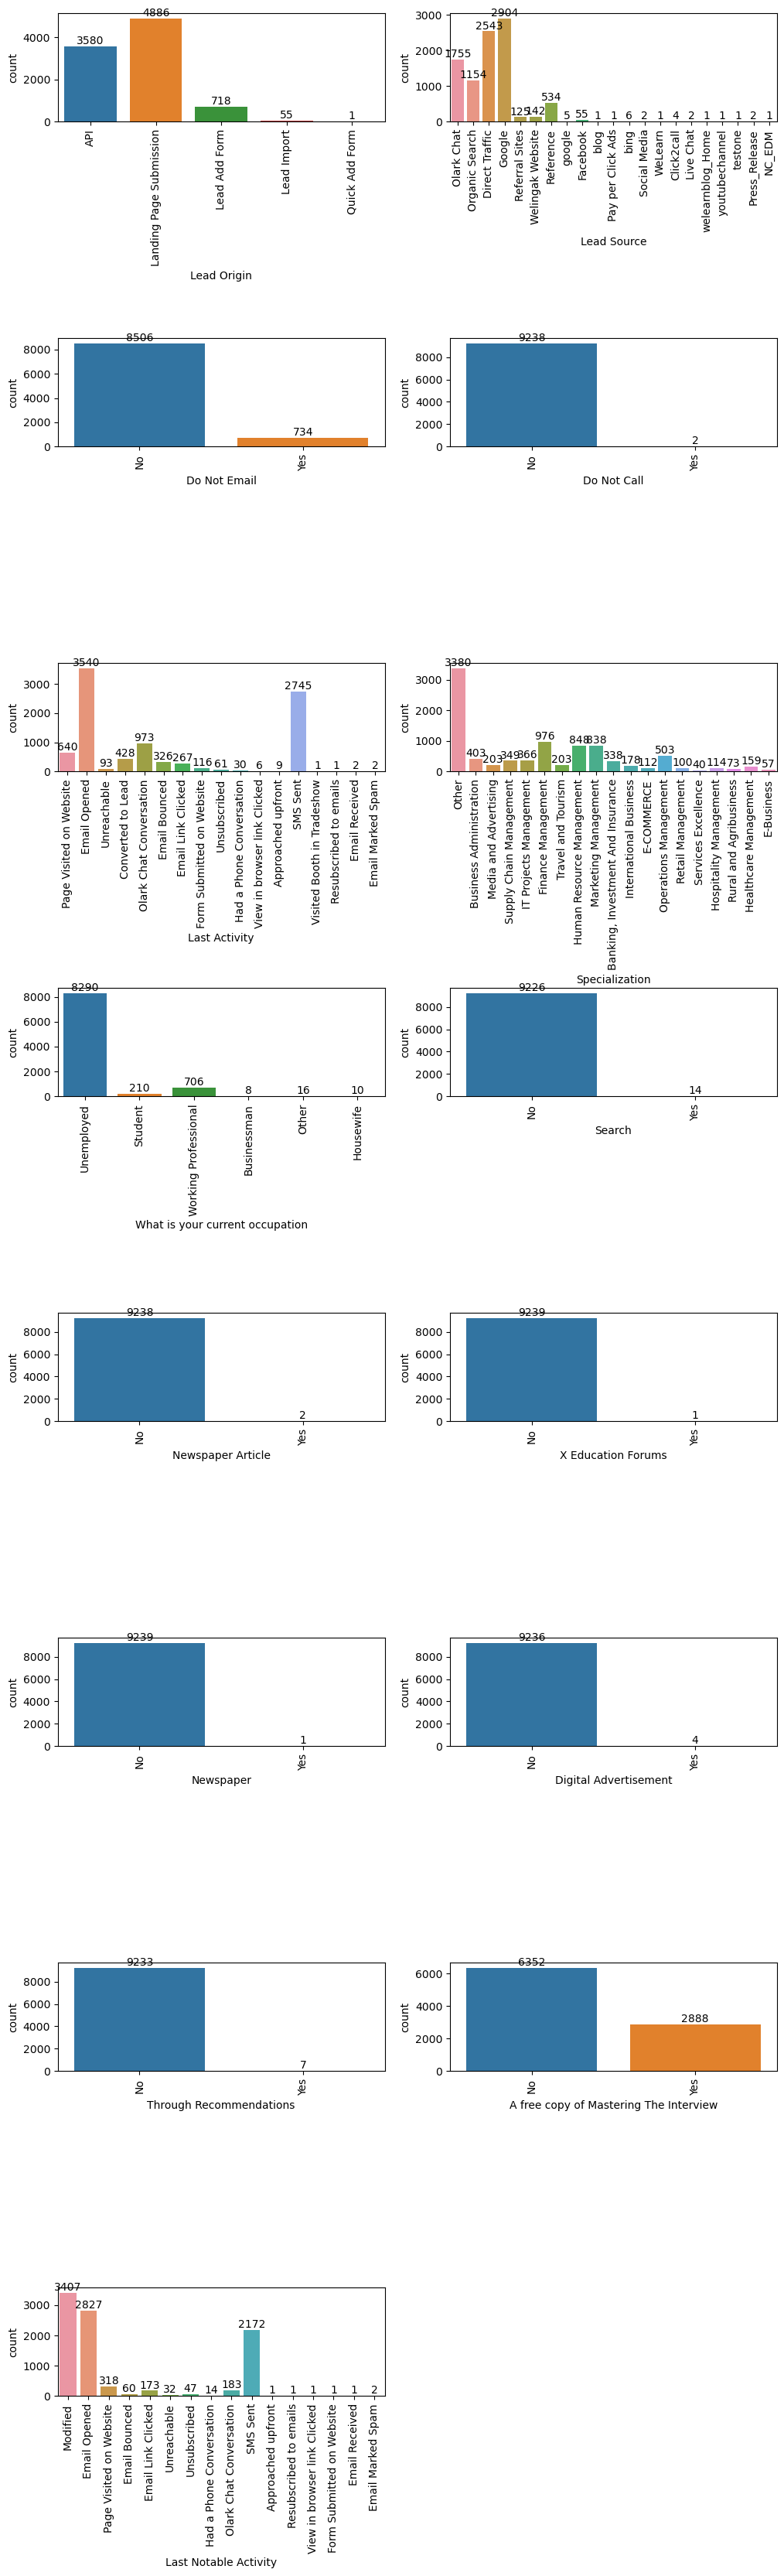

In [27]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = leads1.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=leads1) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        
plt.show()

It's evident that the columns mentioned below have data which is highly skewed towards one side

- 'Do Not Call',
- 'Search',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations'.

Hence these columns can be dropped as they will not add any value to the model and can affect the performance of logistic regression model, as they can lead to biased or inaccurate parameter estimates.

In [28]:
# Dropping categorical columns with highly skewed data

leads1.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",leads1.shape)

After Drop:  (9240, 12)


Now that the Dataframe is free from the columns having missing values and skewed values. We can mode towards handling Outliers.

In [29]:
# Checking outliers in Numerical columns

def Check_Outliers(data, columnList):
    num_columns = len(columnList)
    num_rows = (num_columns // 2) + (num_columns % 2)
    
    plt.figure(figsize=[16, 8])
    plt.subplots_adjust(wspace=0.4, hspace=0.5)
    
    for i, col in enumerate(columnList):
        if col in data.columns:
            plt.subplot(num_rows, 2, i + 1)
            sns.boxplot(y=data[col])
            plt.title(col, fontsize=15, color='brown')
        else:
            print(f"Column '{col}' does not exist in the DataFrame.")
    
    plt.suptitle("Checking Outliers using Boxplot", fontsize=20, color="green")

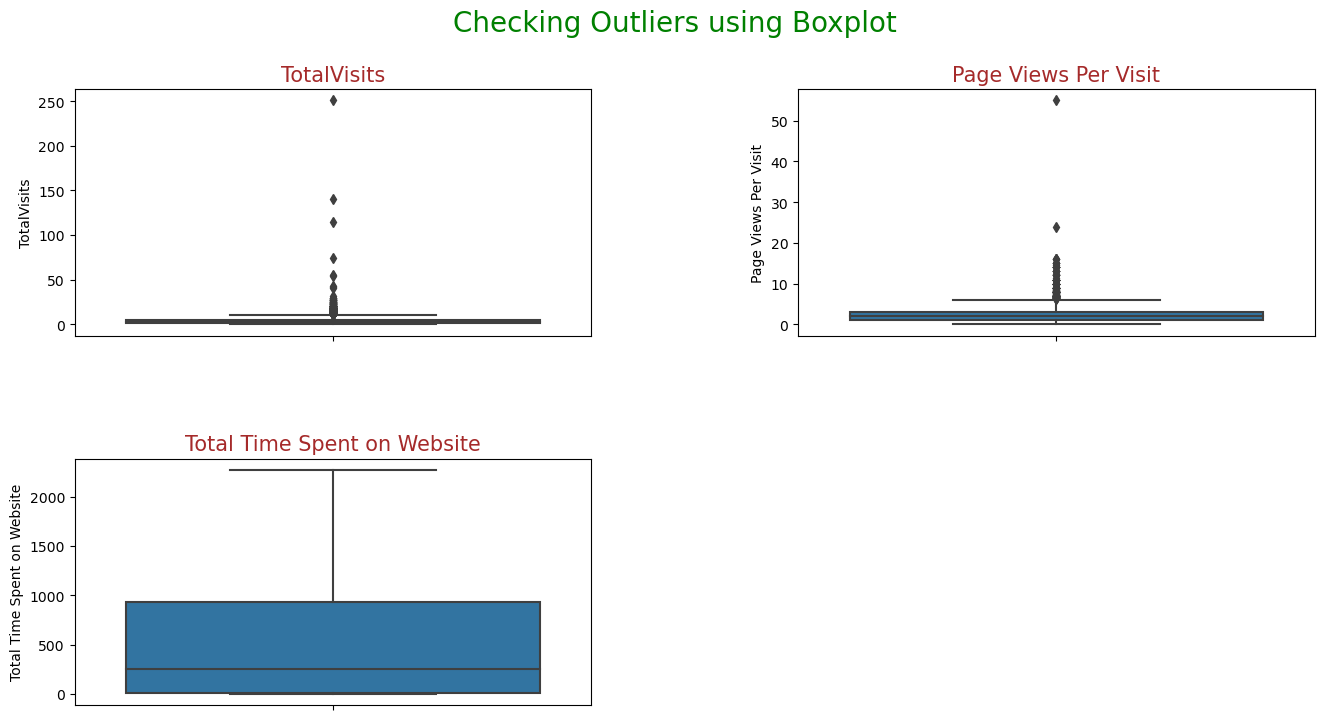

In [30]:
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(leads1,num_cols)

- We can see that the columns 'TotalVisits' & 'Page Views Per Visit' do have outliers present. We need to treat these outliers by capping and flooring

In [31]:
# Defining a function to handle outliers

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [32]:
# Treating outliers for the said columns

capping_cols = ["TotalVisits","Page Views Per Visit"]

# Using the defined function
Outlier_treatment(leads1,capping_cols)


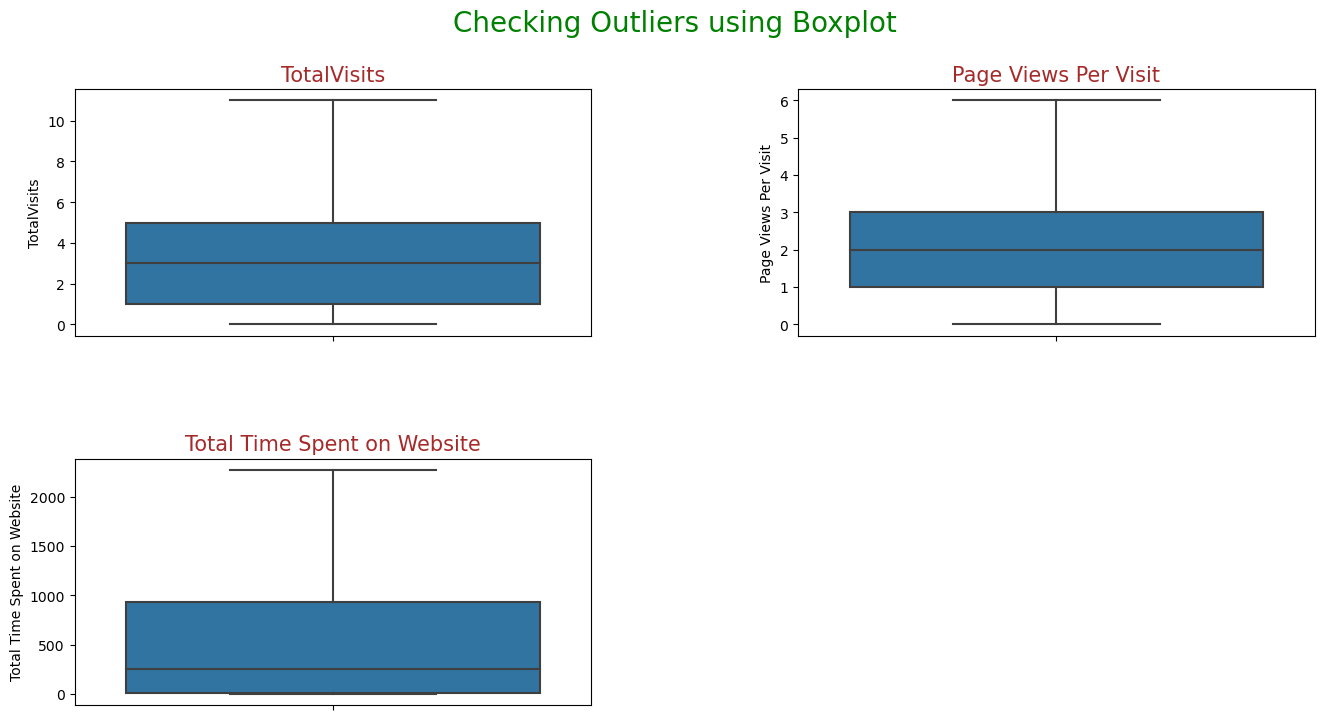

In [33]:
# Checking the numerical columns again

Check_Outliers(leads1,num_cols)

We have now treated the outliers. Let's now move to Data Preparation

<h2 style = "color : Brown"> Step 3: EDA </h2>

### Univariate Analysis

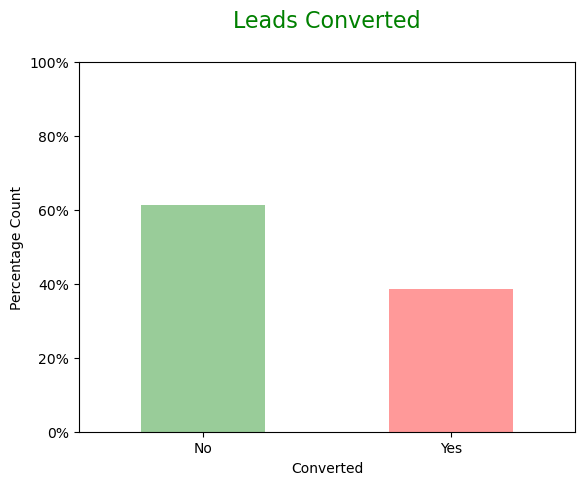

In [34]:
## ploting the results on bar plot

(100*leads1["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})

ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

# Labeling Axes
plt.xlabel('Converted')
plt.ylabel("Percentage Count")

plt.show()

The above plot shows that the data is not highly im-balanced

In [35]:
### Data Imbalance Ratio
from fractions import Fraction
ratio=(leads1["Converted"].value_counts(normalize=True).min())/(leads1["Converted"].value_counts(normalize=True).max())

print("Data Imbalance Ratio -", ratio)

Data Imbalance Ratio - 0.6270470153195985


In [36]:
leads1.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                    Other   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [37]:
#List of categorical columns
cat_cols = ["Lead Origin","What is your current occupation","Do Not Email","A free copy of Mastering The Interview",
            "Lead Source","Last Activity","Specialization","Last Notable Activity"]

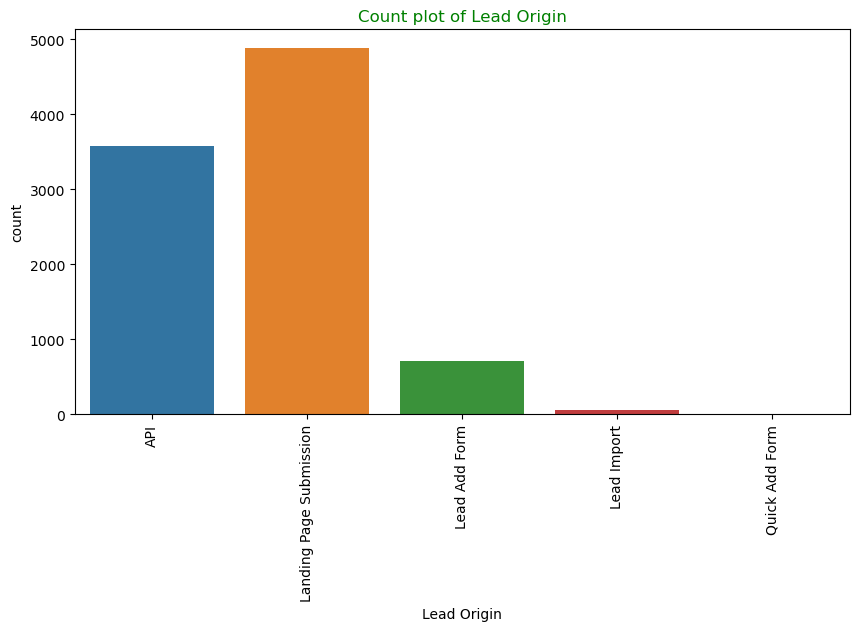

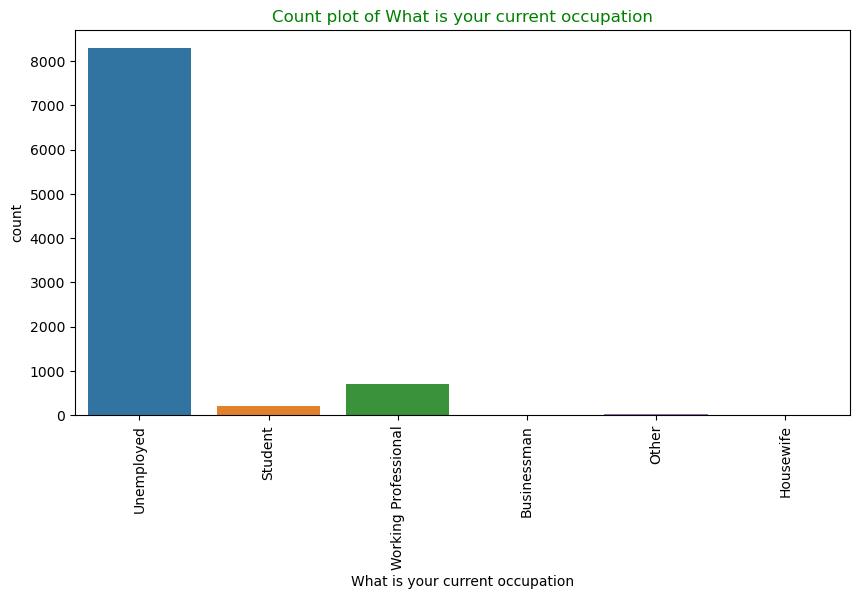

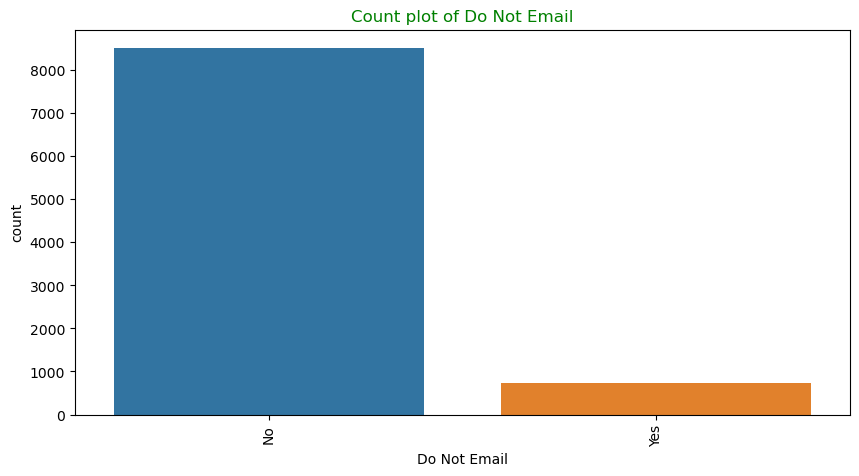

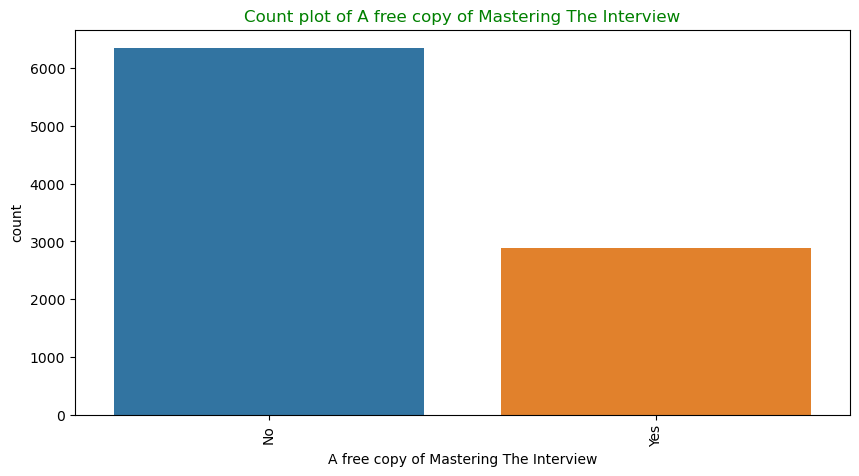

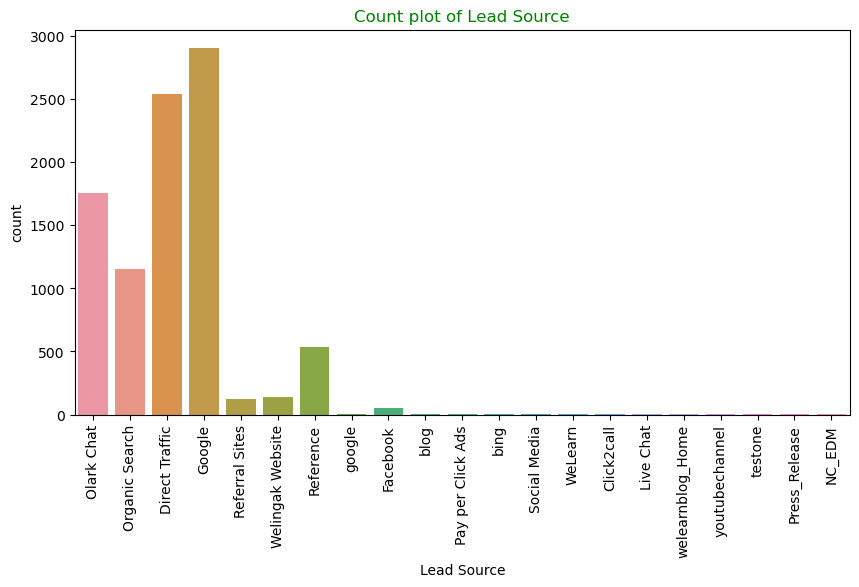

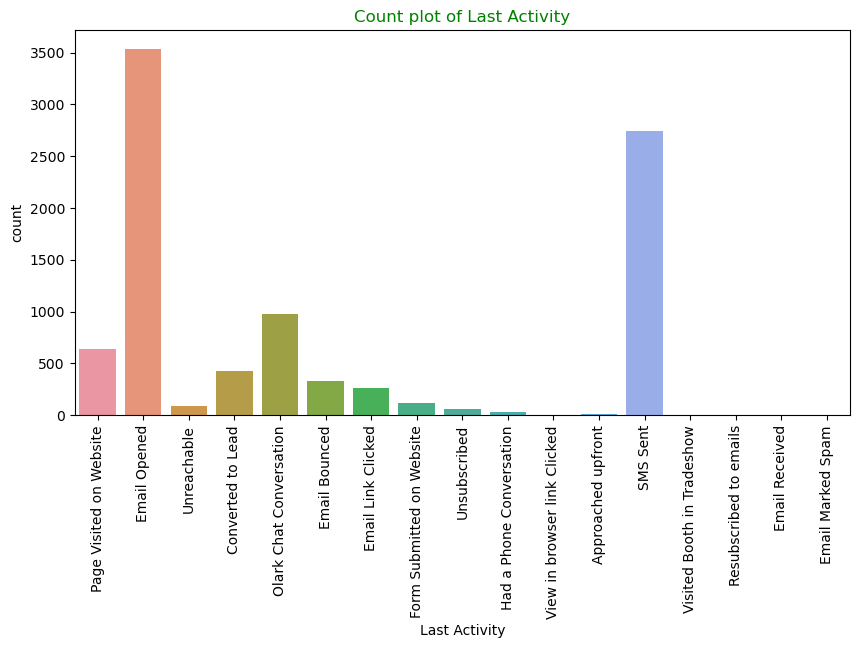

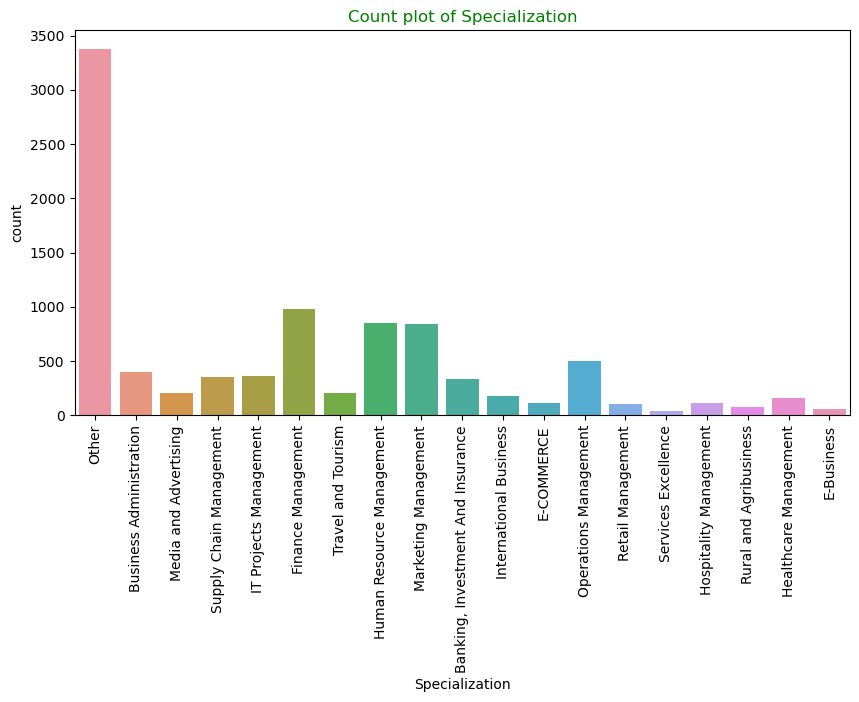

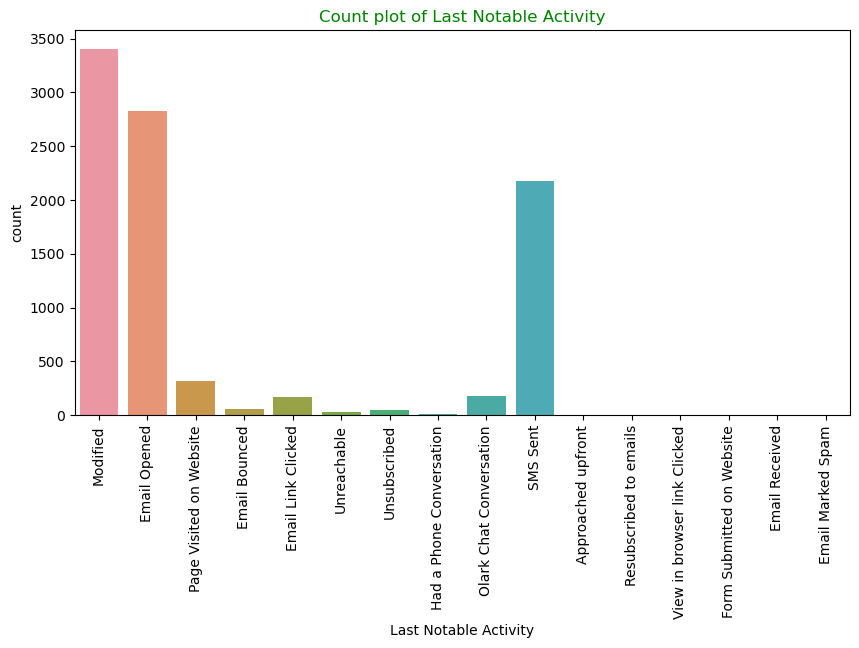

In [38]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    sns.countplot(x=i,data=leads1)
    total=len(leads1[i])
    plt.xticks(rotation=90)
plt.show()

From the above plots, we could infer that:
- Close to 5000 leads were originated from 'Landing page submission'
- More than 8k users have selected Unemployed as their current occupation
- Around 90% of users have opted out of Email notifications
- Only ~3k users have opted for a 'Free copy of Mastering the Interview'
- Google is the main source of Lead Generation. **Also, We can see that there are two columns namely 'Google' and 'google' which represents the same information. Hence, we will be clubbing these columns during Data Preparation.**
- **We can also observe that few columns has levels with very low frequency. These levels will create unnecesary features while introducing Dummy variables. Hence, we will club these columns together as 'Others' during Data Preparation**
- Most of the users have opened the email sent by the sales team
- More than 3k users have not selected anything uder specialization. We had earlier replaced these null values to 'Other'
- **We can also observe that the columns, 'Last Activity' and 'Last Notable Activity' gives somewhat same information. Hence, it is redundant to keep both these columns in the dataframe. We will later drop one of these columns during Data Preparation**

### Bivariate Analysis
#### Categorical columns

In [39]:
#List of categorical columns
cat_cols = ["Lead Origin","What is your current occupation","Do Not Email","A free copy of Mastering The Interview",
            "Lead Source","Last Activity","Specialization","Last Notable Activity"]

In [40]:
def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(12,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    plt.subplot(1,1,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=leads1,palette="prism_r",alpha=0.46)
    
    total=len(leads1[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")

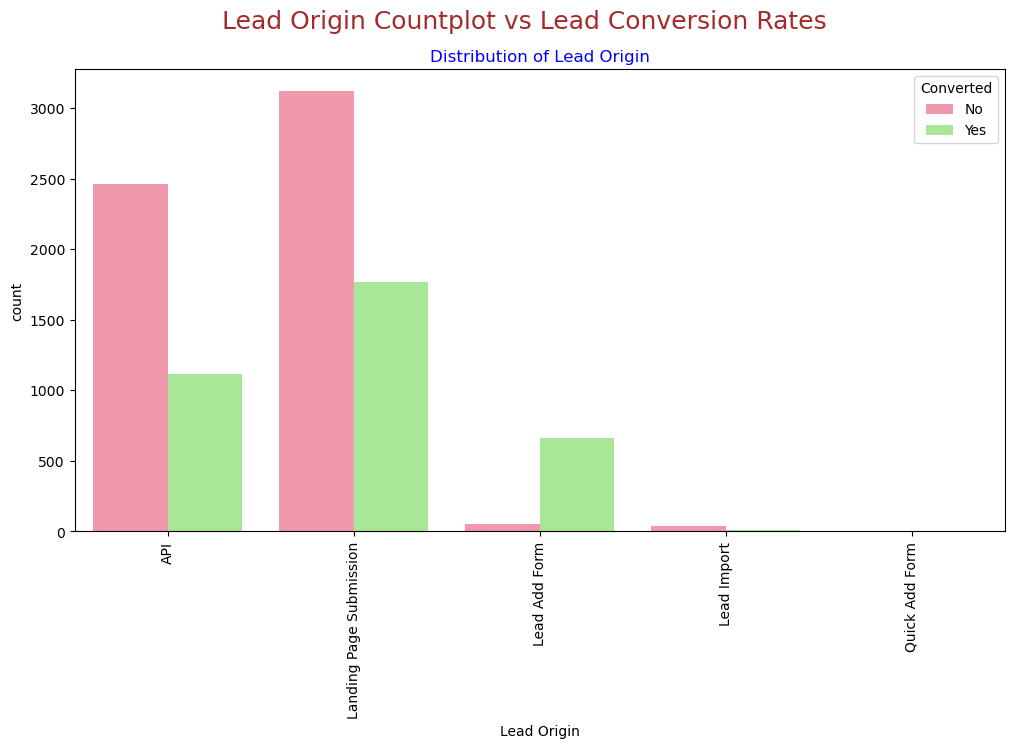

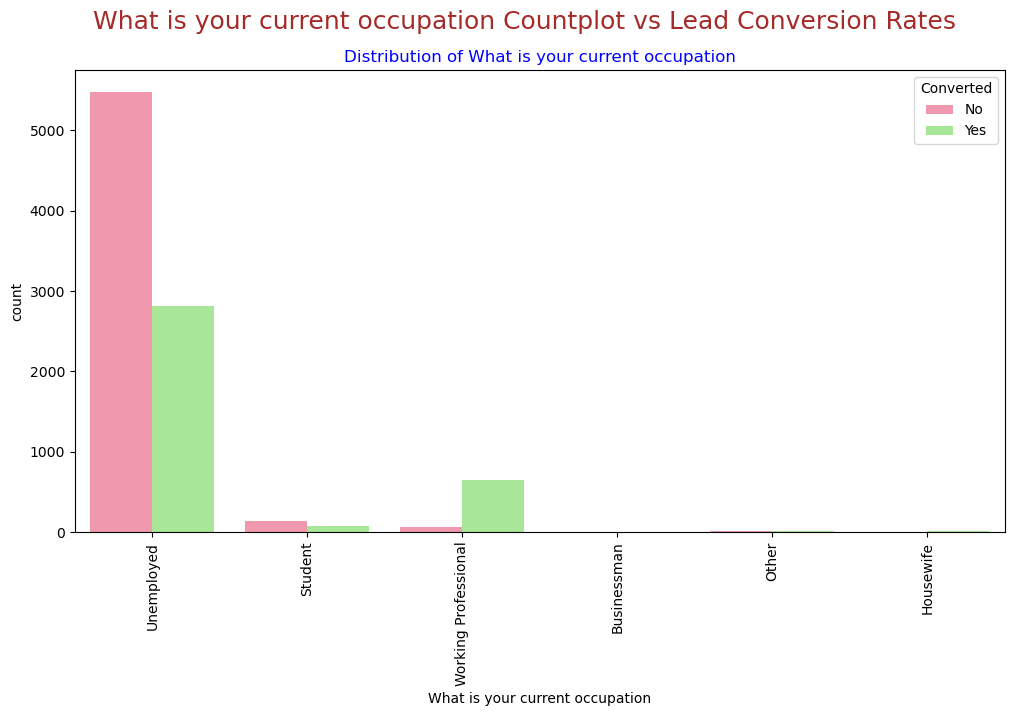

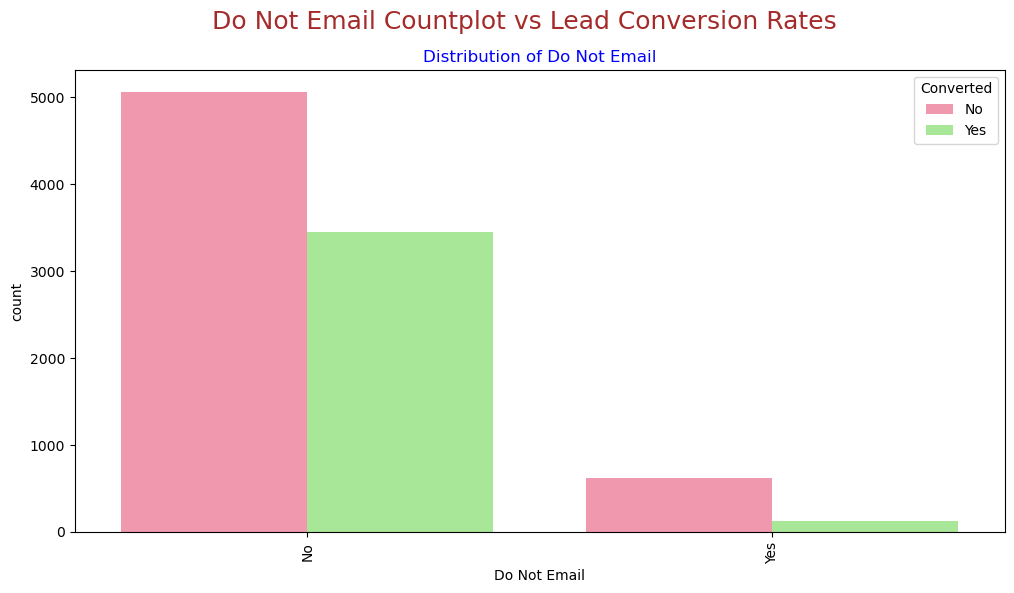

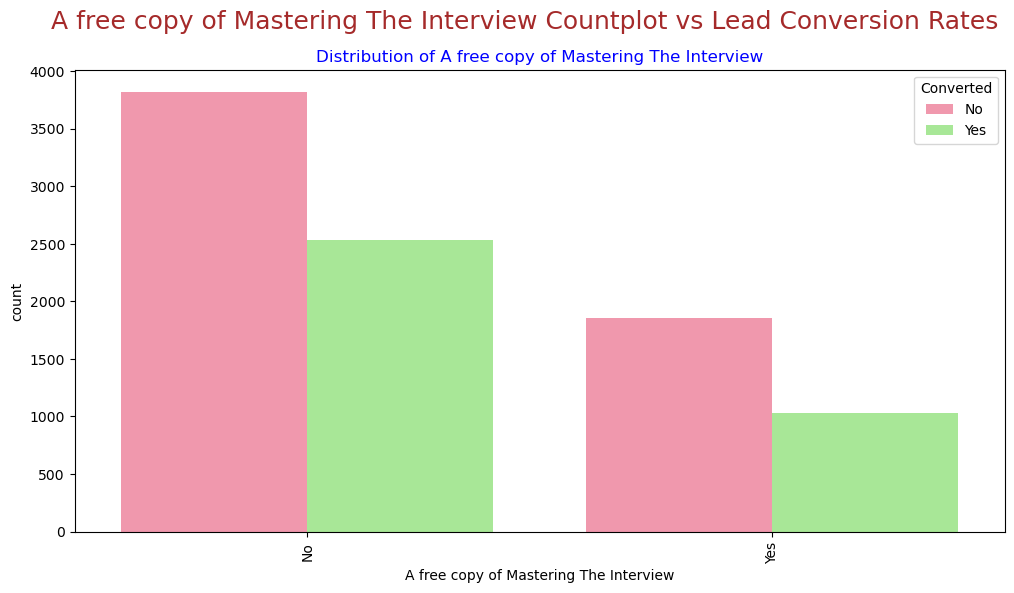

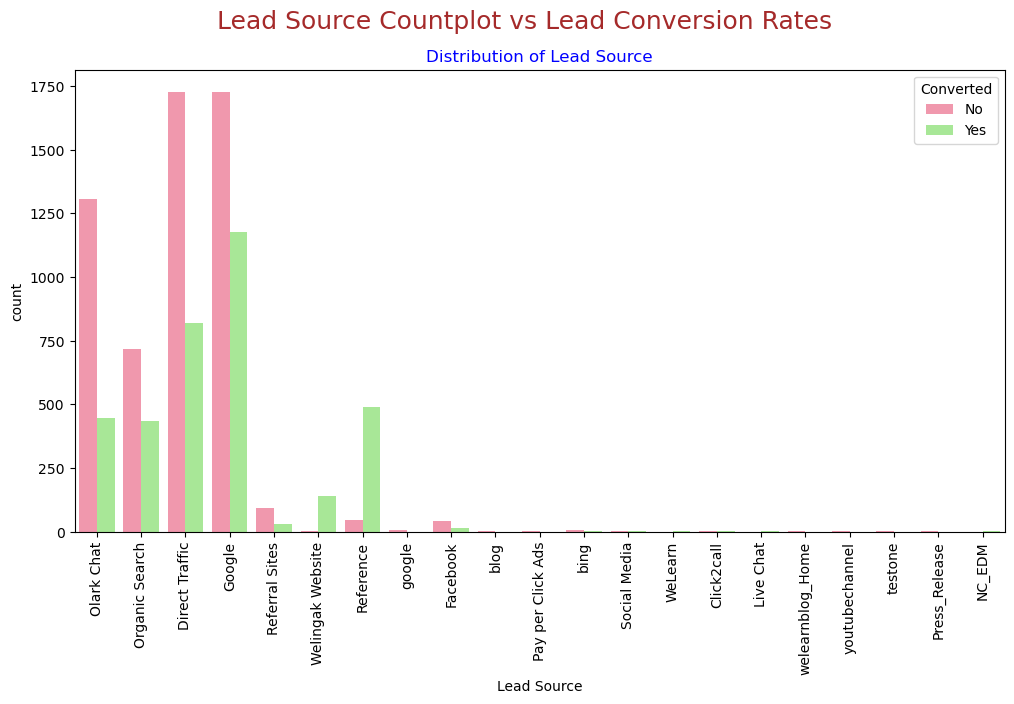

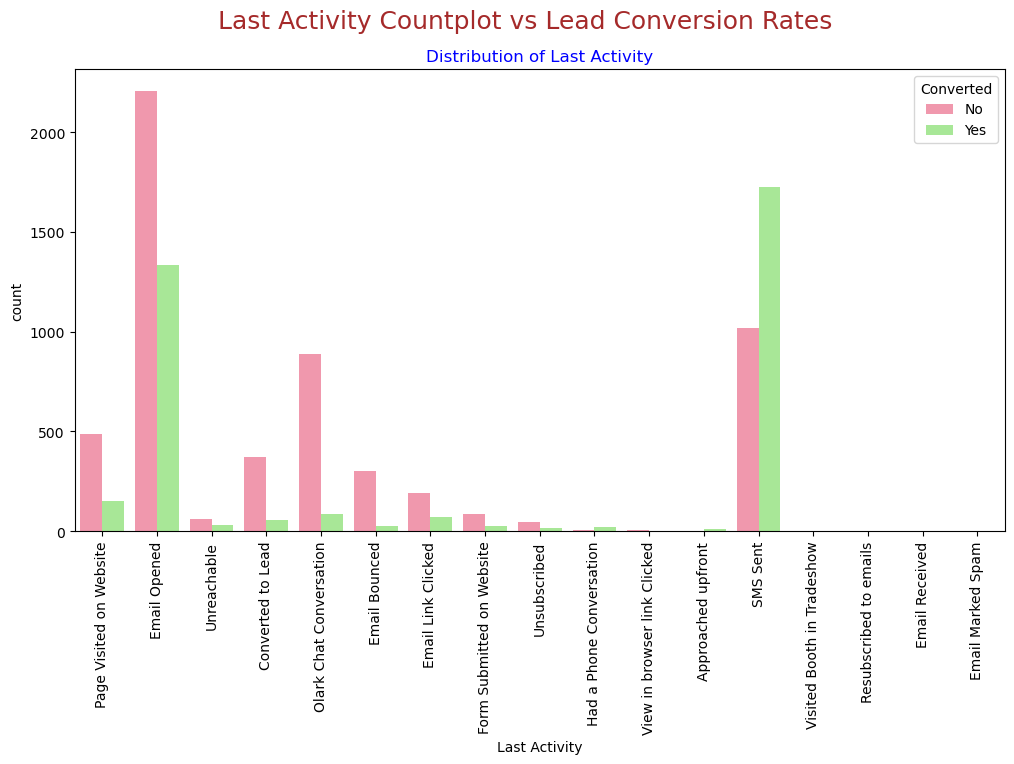

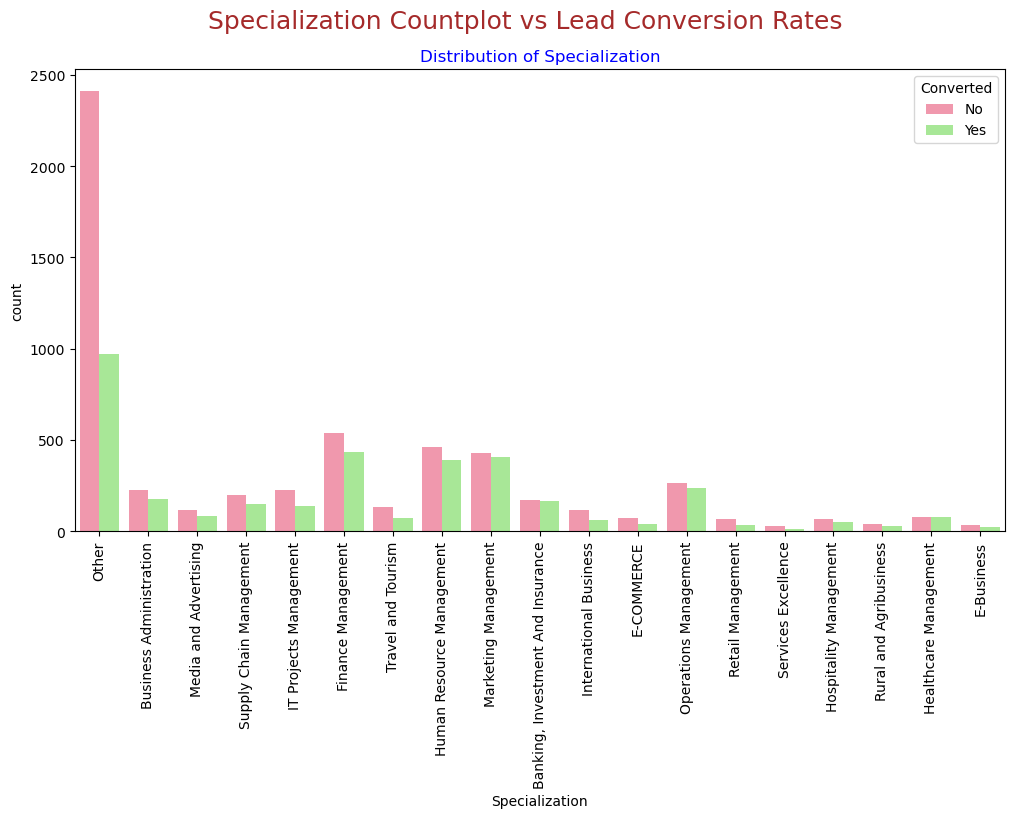

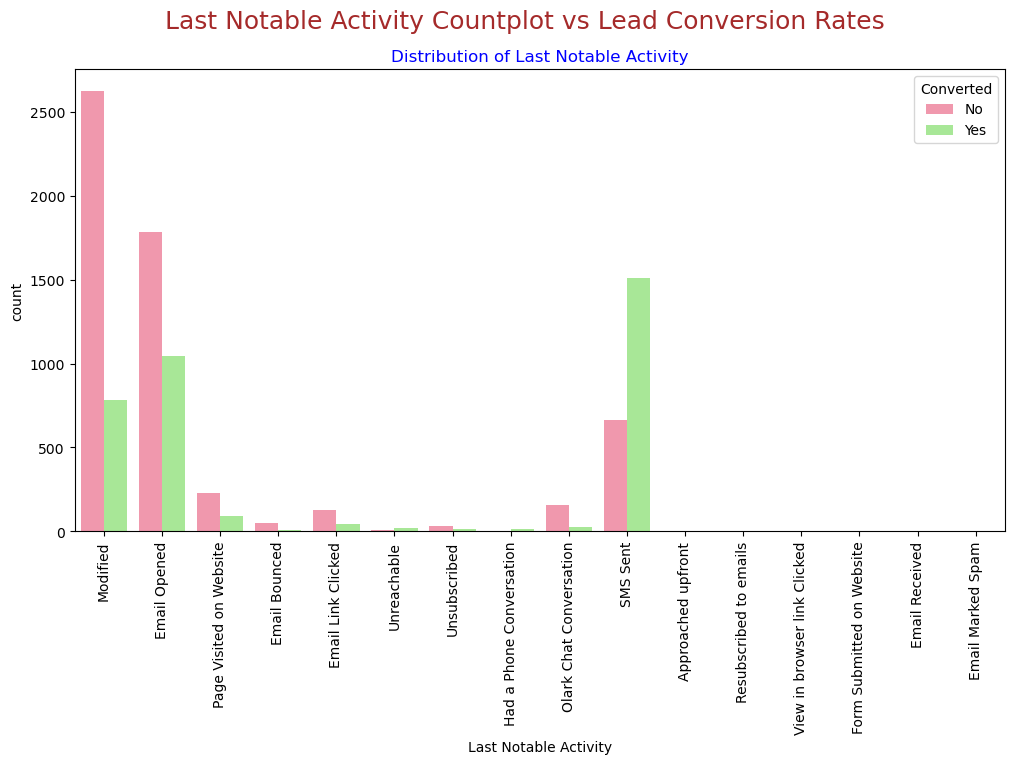

In [41]:
for i in cat_cols:
    Bivariate_cat(leads1,variable_name=i)

From the above plots we observe:
- There is a great conversion rate from the leads originated from 'Add form', followed by 'Landing page submission'
-  Around 90% of the customers are Unemployed with good lead conversion rate. While Working Professional contribute less than 10% of total customers with amazing lead conversion rate
- Leads coming from Google has good conversion rate followed by Direct traffic. Leads generated through references are very low in numbers but the conversion rate is very high
- The users who have sent SMS after being contacted by the sales team show great rate of conversion
- Marketing Managemt,HR Management,Finance Management shows good contribution.

### Bivariate Analysis
#### Numerical columns

<Figure size 1200x600 with 0 Axes>

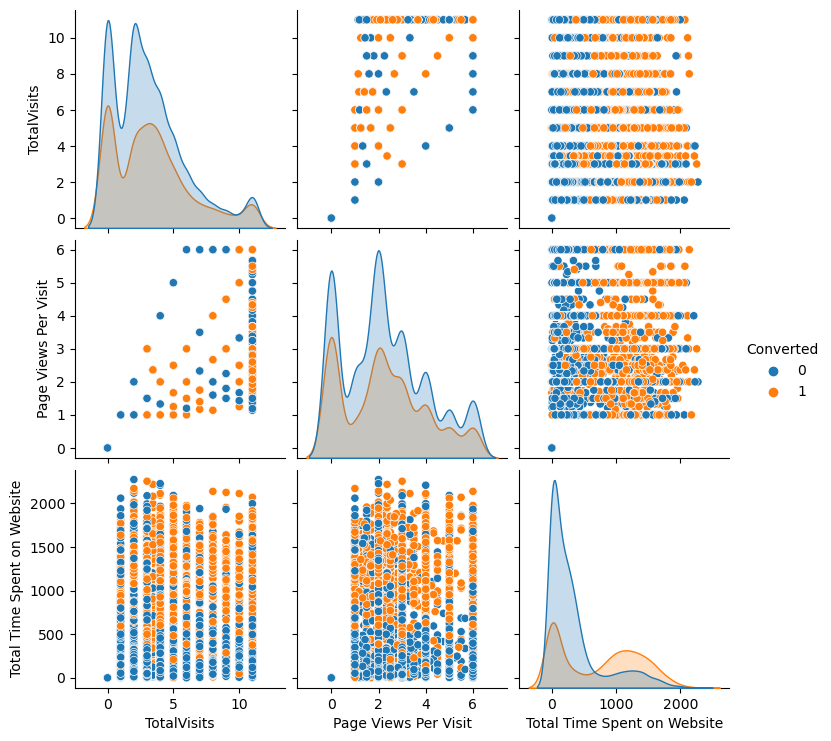

In [42]:
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

plt.figure(figsize=(12, 6))
sns.pairplot(data=leads1,vars=num_cols,hue="Converted")                                  
plt.show()

From the above plots we see that the variables 'TotalVisits' & 'Page Views Per Visit' have a linear relationship

----
**Now that we have performed Data Analysis, we can move to Data Preparation for model building**

<h2 style = "color : Brown"> Step 4: Data Preparation </h2>

### Fixing Redundant column names & Standardising Data in columns

As mentioned earlier, the columns, 'Last Activity' and 'Last Notable Activity' gives somewhat same information. Hence, it is redundant to keep both these columns in the dataframe. 
Hence, We will drop one of these columns

In [43]:
# Dropping 'Last Notable Activity' Column

leads1.drop(columns='Last Notable Activity', axis=1, inplace=True)

Another thing that we observed earlier was afew columns having levels with very low frequency. These levels will create unnecesary features while introducing Dummy variables. Hence, we will club these columns together as 'Others'

The columns having levels with low frequency are 'Last Activity' and 'Lead Source'

In [44]:
# Grouping low frequency value levels to Others 
leads1['Last Activity'] = leads1['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                           'Approached upfront','View in browser link Clicked',
                                                           'Email Marked Spam','Email Received','Visited Booth in Tradeshow',
                                                           'Resubscribed to emails'],'Others')

leads1['Last Activity'].value_counts()

Last Activity
Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: count, dtype: int64

In [45]:
# Again grouping low frequency value levels to Others 

leads1['Lead Source'] = leads1['Lead Source'].replace(["bing","Click2call","Press_Release","Social Media","Live Chat",
                                                       "youtubechannel","testone","Pay per Click Ads","welearnblog_Home",
                                                       "WeLearn","blog","NC_EDM"],"Others")

leads1['Lead Source'].value_counts()

Lead Source
Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
google                 5
Name: count, dtype: int64

We can also see that there are two columns namely 'Google' and 'google' which represents the same information. Hence, we will be clubbing these columns as 'Google'

In [46]:
# Clubbing the values form columns 'google' & 'Google' to 'Google'
leads1['Lead Source'] = leads1['Lead Source'].replace("google","Google")
leads1['Lead Source'].value_counts()

Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: count, dtype: int64

In [47]:
#Let's check the data frame once again

leads1.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead                    Other   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

Note that the columns "Do Not Email" & "A free copy of Mastering The Interview" both are binary categorical columns
lets mapthe values from these columns for 'yes' & 'no' to '1' & '0'

In [48]:
# Mapping binary categorical variables (Yes/No to 1/0) 
leads1['Do Not Email'] = leads1['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leads1['A free copy of Mastering The Interview'] = leads1['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [49]:
#Let's check the data frame once again

leads1.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead                    Other   

  What is your current occupation  A free copy of Mastering The Interview  
0                      Unemployed                                       0  
1                      Unemployed                                       0  
2                         Student                                       1  
3                      Unemployed                                       0  
4                      Unemployed                                       0

### Introducing Dummy Variables

We will now introduce Dummy Variables for all the categorical columns

In [50]:
#Creating dummy variables for the above mentioned categorical variables using the 'drop first' approach.
dummy = pd.get_dummies(leads1[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"]], drop_first=True, dtype=int)

In [51]:
# Concatinating the results to the dataframe
leads1 = pd.concat([leads1, dummy], axis=1)

In [52]:
# Dropping columns for which we have introduced dummy variables
leads1.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"],axis=1, inplace=True)

In [53]:
# Reading the DataFrame Again

leads1.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                     

In [54]:
leads1.shape

(9240, 49)

In [55]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   int32  
 7   Lead Origin_Lead Add Form                             9240 non-null   int32  
 8   Lead Origin_Lead Import                               9240

All the features have now been converted to Numerical DataType. We can now go ahead with Model Building

<h2 style = "color : Brown"> Step 5: Model Building </h2>

<h3 style = "color : Green"> Splitting the DataFrame using Test-Train Split </h3>

In [56]:
# Importing necessary libraries

from sklearn.model_selection import train_test_split

In [57]:
# Saving Independent variables as X
X = leads1.drop('Converted', axis=1)

# Saving Dependent/Target variable as y
y = leads1["Converted"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [59]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [60]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


<h3 style = "color : Green"> Scaling </h3>

In [61]:
# Importing necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -1.124680                    -0.885371   
6795             0     0.272833                     0.005716   
3516             0     0.622211                    -0.691418   
8105             0     0.622211                     1.365219   
3934             0    -1.124680                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871             -1.269958                                       0   
6795             -0.519633                                       1   
3516              0.140427                                       0   
8105              1.550812                                       0   
3934             -1.269958                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1871                        0                           0   
6795                        0                           0   
3516                        0                           0   
8105                        0                           0   
3934                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
1871                     0                   0                       1   
6795                     0                   0                       0   
3516                     0                   0                       1   
8105                     0                   1                       0   
3934                     0                   0                       1   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1871                           0                   0                      0   
6795                           0                   0                      0   
3516                           0                   0                      0   
8105                           0                   0                      0   
3934                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                           0                             0   
6795                           0                             0   
3516                           0                             0   
8105                           0                             0   
3934                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1871                            0                                 0   
6795                            0                                 0   
3516                            0                                 0   
8105                            0                                 0   
3934                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
1871                           1                                        0   
6795                           1                                        0   
3516                           1                                        0   
8105                           0                                        0   
3934                           1                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                     0   
6795                                      0            

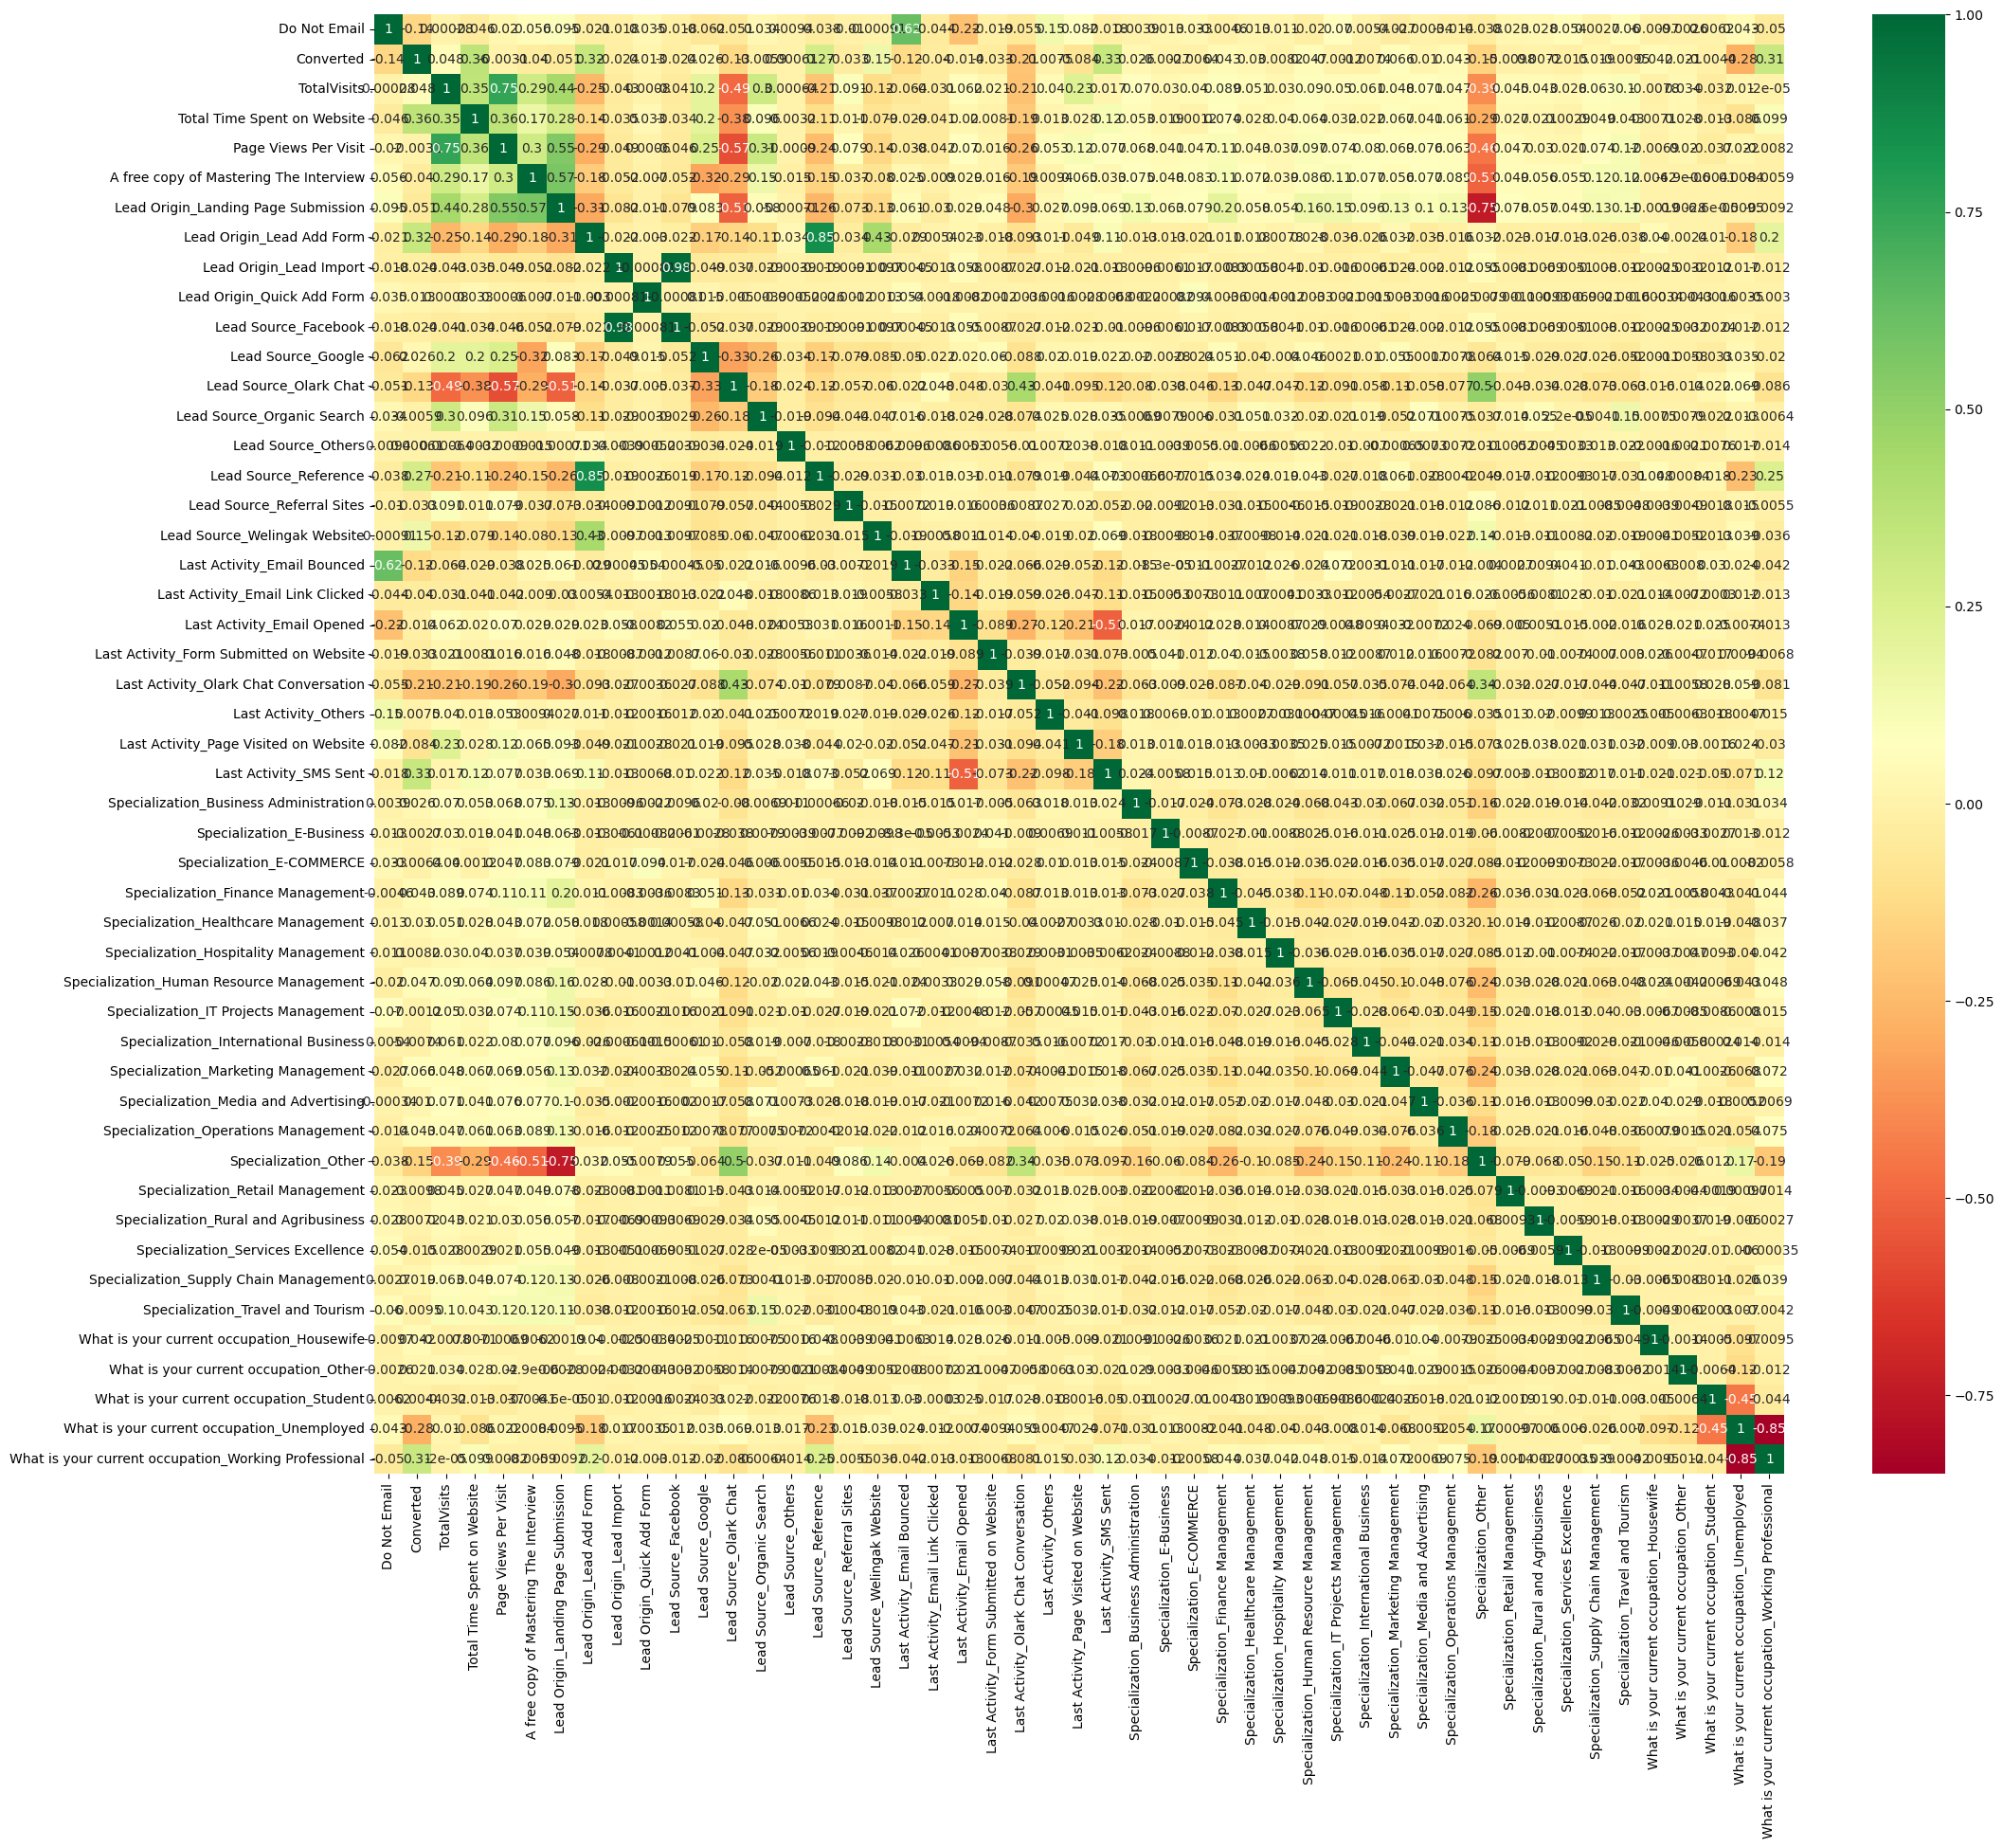

In [63]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24,20))
sns.heatmap(leads1.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

We cannot get much information from the heatmap because there are so many variables. Let's just start building a Logistic Regression Model.

In [64]:
# Importing necessary libraries

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statsmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

<h3 style = "color : Green"> Feature Selection Using RFE </h3>

In [65]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [66]:
#checking the result after performing RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', False, 16),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited 

In [67]:
# storing columns selected after performing RFE in rfe_col
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [68]:
# Saving selected columns in a DataFrame
X_train_rfe = X_train[rfe_col]

In [69]:
# Let's define a function which will get the VIF for variables 
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

In [70]:
#Checking VIF for the variables

get_vif(X_train_rfe)

Features    VIF
0          What is your current occupation_Unemployed  11.59
1                 Lead Origin_Landing Page Submission   5.95
2                                Specialization_Other   4.05
3                          Last Activity_Email Opened   3.08
4                              Last Activity_SMS Sent   2.65
5                              Lead Source_Olark Chat   2.27
6               Last Activity_Olark Chat Conversation   1.86
7   What is your current occupation_Working Profes...   1.84
8                           Lead Origin_Lead Add Form   1.83
9                        Lead Source_Welingak Website   1.28
10                        Total Time Spent on Website   1.25
11                                       Do Not Email   1.23
12                               Last Activity_Others   1.11
13              Specialization_Hospitality Management   1.02
14          What is your current occupation_Housewife   1.02

We generally look for a VIF that is less than 5. So there are clearly some variables we need to drop.

Let's also build a Logistic Regression model and find the P-values of the variables to decide which variable to drop first.

<h3 style = "color : Green"> Model # 1 </h3>

In [71]:
# Building model using statsmodels, for the detailed statistics using columns selected by RFE 

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                                   -0.563207
Do Not Email                                            -1.211672
Total Time Spent on Website                              1.066897
Lead Origin_Landing Page Submission                     -1.128823
Lead Origin_Lead Add Form                                3.022335
Lead Source_Olark Chat                                   1.018741
Lead Source_Welingak Website                             2.591609
Last Activity_Email Opened                               0.750794
Last Activity_Olark Chat Conversation                   -0.703396
Last Activity_Others                                     1.407451
Last Activity_SMS Sent                                   1.924551
Specialization_Hospitality Management                   -1.063417
Specialization_Other                                    -1.175033
What is your current occupation_Housewife               22.563730
What is your current occupation_Unemployed              -0.407543
What is yo

In [72]:
#Let's see the summary of this model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.9
Date:                Tue, 23 Jul 2024   Deviance:                       5373.7
Time:                        12:33:42   Pearson chi2:                 8.22e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

The maximum p-value we can have is 0.05 
From the above statsmodel 'What is your current occupation_Housewife' is the feature with the highest p-value. Thus we will drop this feature.

<h3 style = "color : Green"> Model # 2 </h3>

In [73]:
# Dropping 'What is your current occupation_Housewife' column
rfe_col=rfe_col.drop("What is your current occupation_Housewife")

In [74]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                                  -0.402781
Do Not Email                                           -1.216668
Total Time Spent on Website                             1.065905
Lead Origin_Landing Page Submission                    -1.125050
Lead Origin_Lead Add Form                               3.030437
Lead Source_Olark Chat                                  1.015796
Lead Source_Welingak Website                            2.586219
Last Activity_Email Opened                              0.748307
Last Activity_Olark Chat Conversation                  -0.710319
Last Activity_Others                                    1.403168
Last Activity_SMS Sent                                  1.919028
Specialization_Hospitality Management                  -1.070529
Specialization_Other                                   -1.177577
What is your current occupation_Unemployed             -0.564960
What is your current occupation_Working Professional    2.095360
dtype: float64

In [75]:
#Let's see the summary of this model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.4
Date:                Tue, 23 Jul 2024   Deviance:                       5384.9
Time:                        12:33:42   Pearson chi2:                 8.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [76]:
#Checking VIF for the variables

get_vif(X_train_rfe)

Features    VIF
0          What is your current occupation_Unemployed  11.45
1                 Lead Origin_Landing Page Submission   5.90
2                                Specialization_Other   4.04
3                          Last Activity_Email Opened   3.06
4                              Last Activity_SMS Sent   2.65
5                              Lead Source_Olark Chat   2.27
6               Last Activity_Olark Chat Conversation   1.86
7   What is your current occupation_Working Profes...   1.83
8                           Lead Origin_Lead Add Form   1.81
9                        Lead Source_Welingak Website   1.27
10                        Total Time Spent on Website   1.25
11                                       Do Not Email   1.23
12                               Last Activity_Others   1.11
13              Specialization_Hospitality Management   1.02

'What is your current occupation_Unemployed' is the feature with the highest p-value and the highest VIF. Thus we will drop this feature.

<h3 style = "color : Green"> Model # 3 </h3>

In [77]:
# Dropping 'What is your current occupation_Unemployed' column
rfe_col=rfe_col.drop("What is your current occupation_Unemployed")

In [78]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                                  -0.952024
Do Not Email                                           -1.216202
Total Time Spent on Website                             1.066049
Lead Origin_Landing Page Submission                    -1.124447
Lead Origin_Lead Add Form                               3.046808
Lead Source_Olark Chat                                  1.022836
Lead Source_Welingak Website                            2.561375
Last Activity_Email Opened                              0.751451
Last Activity_Olark Chat Conversation                  -0.703482
Last Activity_Others                                    1.392287
Last Activity_SMS Sent                                  1.909112
Specialization_Hospitality Management                  -1.065775
Specialization_Other                                   -1.182373
What is your current occupation_Working Professional    2.644358
dtype: float64

In [79]:
#Let's see the summary of this model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.7
Date:                Tue, 23 Jul 2024   Deviance:                       5391.4
Time:                        12:33:42   Pearson chi2:                 8.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3909
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [80]:
# Now checking VIFs for all variables in Model 3 
get_vif(X_train_rfe)

Features   VIF
0                 Lead Origin_Landing Page Submission  2.79
1                                Specialization_Other  2.58
2                          Last Activity_Email Opened  2.54
3                              Last Activity_SMS Sent  2.28
4                              Lead Source_Olark Chat  2.16
5               Last Activity_Olark Chat Conversation  1.75
6                           Lead Origin_Lead Add Form  1.62
7                        Lead Source_Welingak Website  1.26
8                         Total Time Spent on Website  1.25
9                                        Do Not Email  1.21
10  What is your current occupation_Working Profes...  1.20
11                               Last Activity_Others  1.09
12              Specialization_Hospitality Management  1.02

**From the above model, we can observe that the values such as the p-value and the VIFs are well under the threashold.**

**Hence, we can conclude that Model 3 is our best model**

- Let's now move to model evaluation

<h2 style = "color : Brown"> Step 6: Model Evaluation </h2>

In [81]:
# Getting the predicted values on the train set
y_train_pred = logm3.predict(X_train_sm3)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.469641
6795    0.075767
3516    0.250266
8105    0.783814
3934    0.213499
4844    0.988603
3297    0.108799
8071    0.997136
987     0.184146
7423    0.867572
dtype: float64

In [82]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.46964072, 0.07576716, 0.25026569, 0.78381381, 0.2134994 ,
       0.98860312, 0.10879899, 0.99713619, 0.18414606, 0.86757154])

In [83]:
# Creating a dataframe with the actual and predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values - actual Converted values from leads1 dataset
# y_train_pred - probability of Converted values predicted by model

Converted  Converted_Prob  Prospect ID
0          0        0.469641         1871
1          0        0.075767         6795
2          0        0.250266         3516
3          0        0.783814         8105
4          0        0.213499         3934

**Let's start with default 0.5 as the optimal cutoff value and add a new feature predicted in above dataframe using the probabilities**

In [84]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.469641         1871          0
1          0        0.075767         6795          0
2          0        0.250266         3516          0
3          0        0.783814         8105          1
4          0        0.213499         3934          0

Let's create a confusion matrix to evaluate the performance

<h3 style = "color : Green"> Confusion Matrix </h3>

In [85]:
# Confusion matrix  (Actual vs Predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3588  414]
 [ 822 1644]]


<h3 style = "color : Green"> Performance Evaluation </h3>

In [86]:
# Checking other performance evaluation metrics keeping the cutoff threshold as 0.5

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# Calculating sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6666666666666666


In [88]:
# Calculating Specificity of our logistic regression model
print("Specificity :",TN / float(TN+FP))

Specificity : 0.896551724137931


In [89]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.10344827586206896


In [90]:
# positive predictive value 
print (TP / float(TP+FP))

0.7988338192419825


In [91]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8136054421768707


Let's plot an ROC curve to check the tradeoff between sensitivity and specificity

<h3 style = "color : Green"> ROC Curve </h3>

In [92]:
# Let's define a function to draw an ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

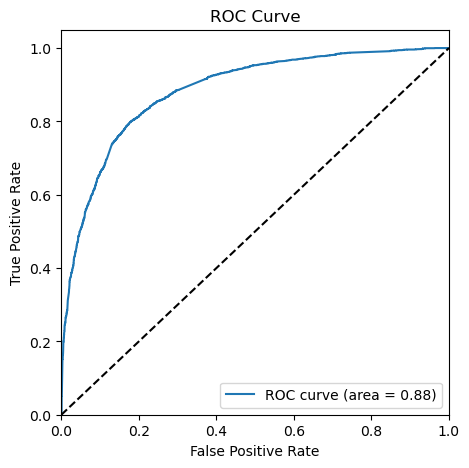

In [94]:
# ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

AS evident, the Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

**Let's now find an Optimal cutoff probability by finding the intersection of Accuracy, Specificity and Sensitivity**

In [95]:
# Let's first create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.469641         1871          0    1    1    1    1    1   
1          0        0.075767         6795          0    1    0    0    0    0   
2          0        0.250266         3516          0    1    1    1    0    0   
3          0        0.783814         8105          1    1    1    1    1    1   
4          0        0.213499         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.598021  0.972425  0.367316
0.2   0.2  0.734075  0.921736  0.618441
0.3   0.3  0.797310  0.841038  0.770365
0.4   0.4  0.815090  0.773723  0.840580
0.5   0.5  0.808905  0.666667  0.896552
0.6   0.6  0.798856  0.601379  0.920540
0.7   0.7  0.782622  0.517437  0.946027
0.8   0.8  0.757112  0.414031  0.968516
0.9   0.9  0.708874  0.252636  0.990005


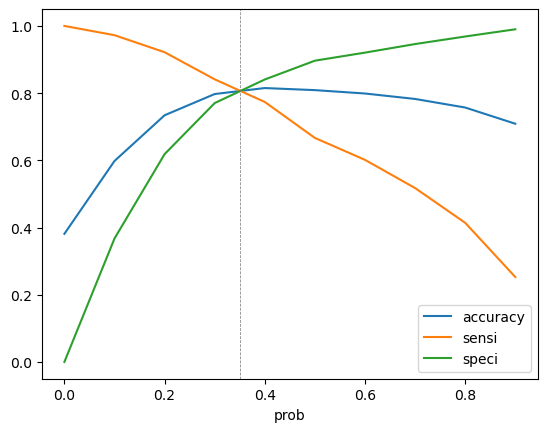

In [97]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')

plt.show()

**The above plot shows that the intersection of all the curves is approximately as 0.35. So we will take o.35 as our Optimal cutoff point for probability threshold**

Let's again find the predicted probabilities with the new cut-off threshold

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.469641         1871                1
1          0        0.075767         6795                0
2          0        0.250266         3516                0
3          0        0.783814         8105                1
4          0        0.213499         3934                0

<h3 style = "color : Green"> Performance Evaluation with new threashold</h3>

In [99]:
# Let's define a function to calculate all the metrics at once

def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [100]:
# Finding Confusion metrics for the DataFrame 'y_train_pred_final'
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("-"*50)

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("-"*50)

Confusion Matrix
[[3228  774]
 [ 469 1997]] 

--------------------------------------------------
True Negative                    :  3228
True Positive                    :  1997
False Negative                   :  469
False Positve                    :  774
Model Accuracy                   :  0.8078
Model Sensitivity                :  0.8098
Model Specificity                :  0.8066
Model Precision                  :  0.7207
Model Recall                     :  0.8098
Model True Positive Rate (TPR)   :  0.8098
Model False Positive Rate (FPR)  :  0.1934
--------------------------------------------------


**It can be observed from the results that most of our metrics namely 'Accuracy', 'Sensitivity', 'Specificity' & 'Recall' are 80% which is the ballpark target conversion rate mentioned in the problem statement. Thus, we will go ahead and use this cutoff to make predictions on the Test-set**


Before we move on to the test set. Let's add the Lead Score feature to the Training set as requested in the case study goals where, A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted

<h3 style = "color : Green"> Assigning a Lead Score</h3>

In [101]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.469641         1871                1          47
1          0        0.075767         6795                0           8
2          0        0.250266         3516                0          25
3          0        0.783814         8105                1          78
4          0        0.213499         3934                0          21

In [102]:
# Finding the coefficicent of features from final model
parameters=logm3.params.sort_values(ascending=False)
parameters

Lead Origin_Lead Add Form                               3.046808
What is your current occupation_Working Professional    2.644358
Lead Source_Welingak Website                            2.561375
Last Activity_SMS Sent                                  1.909112
Last Activity_Others                                    1.392287
Total Time Spent on Website                             1.066049
Lead Source_Olark Chat                                  1.022836
Last Activity_Email Opened                              0.751451
Last Activity_Olark Chat Conversation                  -0.703482
const                                                  -0.952024
Specialization_Hospitality Management                  -1.065775
Lead Origin_Landing Page Submission                    -1.124447
Specialization_Other                                   -1.182373
Do Not Email                                           -1.216202
dtype: float64

<h2 style = "color : Brown"> Step 7: Making Predictions </h2>

<h3 style = "color : Green"> Scaling Test Dataset </h3>

In [103]:
# Scaling the values like we did for the Training Data Set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4269             0     1.670345                     0.964504   
2376             0    -1.124680                    -0.885371   
7766             0     0.622211                    -0.777416   
9199             0    -1.124680                    -0.885371   
4359             0    -1.124680                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
4269              2.114966                                       0   
2376             -1.269958                                       0   
7766              1.550812                                       0   
9199             -1.269958                                       0   
4359             -1.269958                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
4269                        0                           0   
2376                        0                           0   
7766                        0                           0   
9199                        0                           0   
4359                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
4269                     0                   0                       0   
2376                     0                   0                       0   
7766                     0                   1                       0   
9199                     0                   0                       1   
4359                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
4269                           0                   0                      0   
2376                           0                   0                      1   
7766                           0                   0                      0   
9199                           0                   0                      0   
4359                           0                   0                      1   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
4269                           0                             0   
2376                           0                             0   
7766                           0                             0   
9199                           0                             0   
4359                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
4269                            0                                 0   
2376                            0                                 0   
7766                            0                                 0   
9199                            0                                 0   
4359                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
4269                           0                                        0   
2376                           0                                        0   
7766                           0                                        0   
9199                           0                                        0   
4359                           1                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0            

In [104]:
# Selecting columns finalized in the model 

X_test = X_test[rfe_col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
4269             0                     0.964504   
2376             0                    -0.885371   
7766             0                    -0.777416   
9199             0                    -0.885371   
4359             0                    -0.885371   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
4269                       0                             0   
2376                       0                             0   
7766                       0                             0   
9199                       1                             0   
4359                       0                             0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
4269                           0                                      0   
2376                           0                                      0   
7766                           0                                      0   
9199                           0                                      1   
4359                           1                                      0   

      Last Activity_Others  Last Activity_SMS Sent  \
4269                     0                       1   
2376                     0                       1   
7766                     1                       0   
9199                     0                       0   
4359                     0                       0   

      Specialization_Hospitality Management  Specialization_Other  \
4269                                      0                     1   
2376                                      0                     1   
7766                                      0                     0   
9199                                      0                     1   
4359                                      0                     0   

      What is your current occupation_Working Professional  
4269                                                  0     
2376                                                  0     
7766                                                  1     
9199                                                  0     
4359                                                  0

<h3 style = "color : Green"> Making Predictions on Test Dataset </h3>

In [105]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 14)

In [106]:
# making prediction using Logistic Regression model 3
y_test_pred = logm3.predict(X_test_sm)

In [107]:
y_test_pred[:10]

4269    0.690600
2376    0.867344
7766    0.905155
9199    0.059586
4359    0.870161
9186    0.520628
1631    0.427292
8963    0.141361
8007    0.087120
5324    0.310216
dtype: float64

In [108]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.690600
2376  0.867344
7766  0.905155
9199  0.059586
4359  0.870161

In [109]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [110]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.690600
1          1         2376  0.867344
2          1         7766  0.905155
3          0         9199  0.059586
4          1         4359  0.870161

In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.690600
1         2376          1        0.867344
2         7766          1        0.905155
3         9199          0        0.059586
4         4359          1        0.870161

In [112]:
# Considering our final probability cut-off 0.35 on test data

y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.690600                1
1         2376          1        0.867344                1
2         7766          1        0.905155                1
3         9199          0        0.059586                0
4         4359          1        0.870161                1

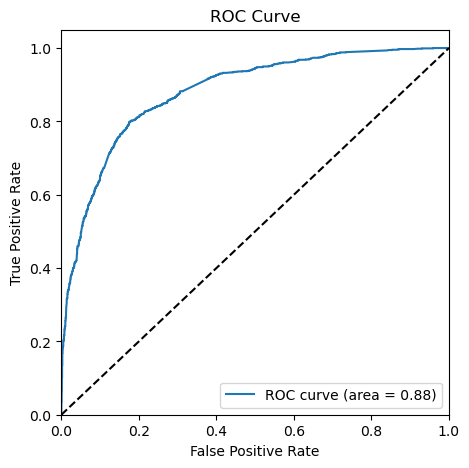

In [113]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

**We are getting the same result on the test set with the Area under the ROC curve as 0.88. That means we have a good predictive model** 

Let's now evalute the model on the Test Set and calculate all the perfromance metrics

<h3 style = "color : Green"> Evaluation </h3>

Calculating all metrics at once

In [114]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])


print("Confusion Matrix")
print(confusion_matrix,"\n")

print("-"*50)

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("-"*50)

Confusion Matrix
[[1366  311]
 [ 216  879]] 

--------------------------------------------------
True Negative                    :  1366
True Positive                    :  879
False Negative                   :  216
False Positve                    :  311
Model Accuracy                   :  0.8099
Model Sensitivity                :  0.8027
Model Specificity                :  0.8145
Model Precision                  :  0.7387
Model Recall                     :  0.8027
Model True Positive Rate (TPR)   :  0.8027
Model False Positive Rate (FPR)  :  0.1855
--------------------------------------------------


<h3 style = "color : Green"> Assigning a Lead Score to Test Dataset </h3>

In [115]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.690600                1          69
1         2376          1        0.867344                1          87
2         7766          1        0.905155                1          91
3         9199          0        0.059586                0           6
4         4359          1        0.870161                1          87

- The customers with a higher lead score have a higher conversion chance
- The customers with a lower lead score have a lower conversion chance.

<h2><span style="color:Red">Conclusion </span></h2> 

<h3><span style="color:Black">Train Data Set:</span></h3>            

- <strong><span style="color:Blue">Accuracy:</span></strong> 80.78%

- <strong><span style="color:Blue">Sensitivity:</span></strong> 80.98%

- <strong><span style="color:Blue">Specificity:</span></strong> 80.66%

- <strong><span style="color:Blue">Recall:</span></strong> 80.98%

<h3><span style="color:Black">Test Data Set:</span></h3> 

- <strong><span style="color:Blue">Accuracy:</span></strong> 80.99%

- <strong><span style="color:Blue">Sensitivity:</span></strong> 80.27%

- <strong><span style="color:Blue">Specificity:</span></strong> 81.45%

- <strong><span style="color:Blue">Recall:</span></strong> 80.27%
 

**The evaluation shows that the values of the performance metrics on the test set are very close to those of the train set. Hence, we can conclude that our model is performing very well with predicting the data.** 

- The model achieved a sensitivity of 80.27% on the test dataset with a cut-off threshold of 0.35.
- Sensitivity here reflects how many leads the model correctly identifies out of all potential converting leads.
- **The CEO of X Education had aimed for a sensitivity target of approximately 80%, which this model meets.**
- The model also reached an accuracy of 80.27%, aligning with the study's objectives.


<h3 style = "color : Green"> ______________________________________END_____________________________________ </h3>